# Titanic project

### Problem statement 

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

## The Data

Loading the data by reading the csv file as data frame

In [2]:
df=pd.read_csv('titanic.csv')

## Exploratory Data Analysis

Exploratory Data Analysis is use to answer all the question like test assumptions, Analysis the data. The main use of it to prepare the data for modeling

there are lot of ways to reach the goals, we can get a basic description of the data,visualize it identify patterens in it, identify the callenges of using data,etc

### Statistical summary

Summarizing your dataset through descriptive statistics, to use a variety of measurements to better understand your dataset.

##### shape function

shape function gives the dimention of dataframe

In [3]:
df.shape

(891, 12)

dataframe has 891 rows and 12 column

##### head() function

head() function is to display the first 5 rows of dataframe

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### tail() function

tail() function is use to display last 5 row of data frame

In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#####  sample() function

sample() function is show the sample randomly

In [6]:
df.sample(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S
87,88,0,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.0500,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S


##### dtypes function

dtypes is use to disply the datatype of data frame

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

here {Name, Sex,Cabin,Ticket,Embarked} are object dtype and {Age,Fare} are float64 dtype and {PassengerId,Survied,Pclass,Sibsp,Parch} are int64 dtype

##### info() function

info() function gives the column names, non-null count, dtype of dataframe, memory usage

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### isnull() function

isnull() function is use to know the null values in data frame, it give th values True and False 

if value is True it indicates null vlaue,else it give false

In [9]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


##### isnull().sum() function

isnull().sum() it give the count of null values present in column 

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

3 columns has null  values 177 in Age column,687 in Cabin,2 in Embarked

### Describe the data

describe function gives the imfomation of count of variables that used to calculate if their is null values that shows less numberrow rows than given in dimention, and function also it gives the infomation of mean, standard deviation,minimum value,25th percentile,50th percentile(which is median),75th percentile and in last it gives maximum value of each column 

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Visualization

Data visualization is a technique that uses an array of static and interactive visuals within a specific context to help people understand and make sense of large amounts of data. The data is often displayed in a story format that visualizes patterns, trends and correlations that may otherwise go unnoticed.


we are using two libraries 

1.matplotlib.pyplot

2.seaborn

<AxesSubplot:>

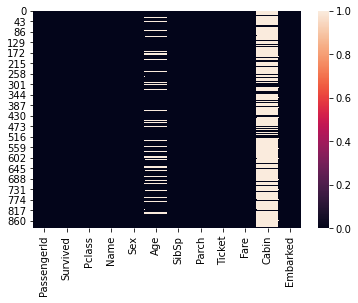

In [12]:
sns.heatmap(df.isnull())

we have null values we can clearly observe the plot that have color difference

Need to check that the variable are effecting the survival rate or not

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

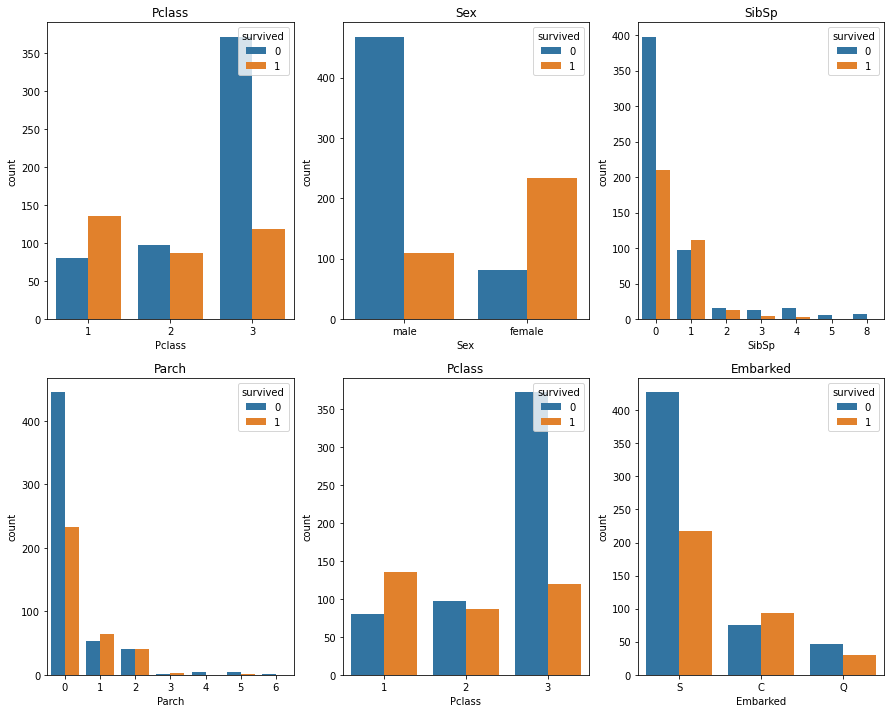

In [13]:
cols=['Pclass','Sex','SibSp','Parch', 'Pclass', 'Embarked'] 
n_rows=2
n_cols=3

# The subplot grid and figure size of each graph
fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*5,n_rows*6))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c #index to go through the number of columns
        ax=axs[r][c] # show where to position each sub plot
        sns.countplot(df[cols[i]],hue=df['Survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived',loc='upper right')
plt.tight_layout

relation of feature values to target value 

In [14]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


we have female are more in survuved than less 

#### survival rate by class

In [15]:
#Look at survival rate by sex and pclass visually
df.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


we have more Survival rate in first class 

<AxesSubplot:xlabel='Sex'>

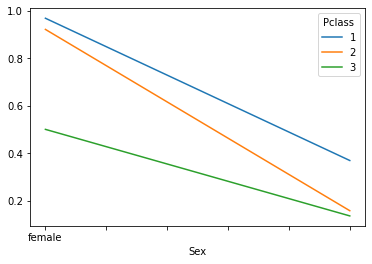

In [16]:
#look at survial tate by sex and pclass visually
df.pivot_table('Survived',index='Sex',columns='Pclass').plot()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

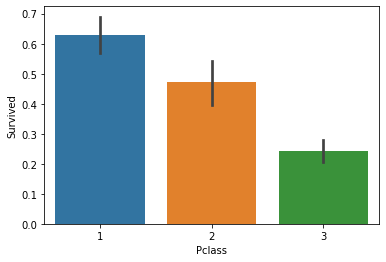

In [17]:
sns.barplot(x='Pclass',y='Survived',data=df)

First class has more survival rate than second class and third class

In [18]:
#look Survival rate in Age
age=pd.cut(df['Age'],[0,16,80])
df.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 16]   0.833333  1.000000  0.545455
       (16, 80]  0.974684  0.906250  0.420290
male   (0, 16]   1.000000  0.818182  0.270270
       (16, 80]  0.377551  0.068182  0.129630

Text(0.5, 1.0, 'price of Each class')

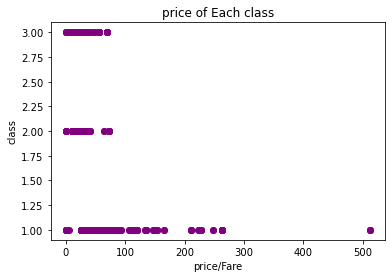

In [19]:
#plot the prices paid of each class
plt.scatter(df['Fare'],df['Pclass'],color='purple')
plt.ylabel('class')
plt.xlabel('price/Fare')
plt.title('price of Each class')

In [20]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

droping unnecessary columns

In [21]:
df1=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [22]:
#drop the rows with missing values
df1=df1.dropna(subset=['Embarked','Age'])

In [23]:
#Check the new dimension
df1.shape

(712, 8)

In [24]:
df1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [25]:
#find unique values in Sex and Embarked feature
print(df1['Sex'].unique())
print(df1['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


### LabelEncoder

In [26]:
le=LabelEncoder()
df1['Sex']=le.fit_transform(df1['Sex'])
df1['Embarked']=le.fit_transform(df1['Embarked'])

In [27]:
print(df1['Sex'].unique())
print(df1['Embarked'].unique())

[1 0]
[2 0 1]


In [28]:
df1.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

all are in the form of numeric values

### spliting the features and target 

In [29]:
x=df1.drop('Survived',axis=1)
y=df1['Survived']

In [30]:
x.shape

(712, 7)

In [31]:
y.shape

(712,)

0    424
1    288
Name: Survived, dtype: int64


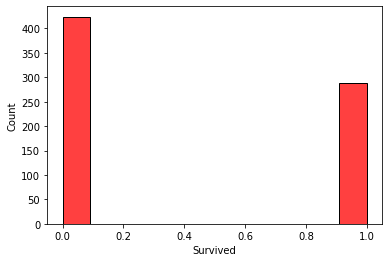

In [32]:
sns.histplot(y,color='red')
print(y.value_counts())

there is imbalance in target variable

### Resampling the data

In [33]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
x_res,y_res=os.fit_resample(x,y)

In [34]:
x_res.shape,y_res.shape

((848, 7), (848,))

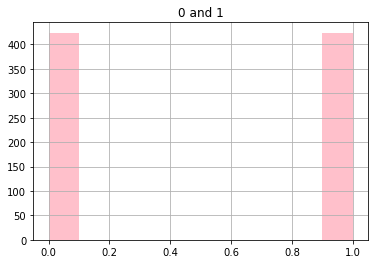

In [35]:
y_res.hist(grid=True,color='pink')
plt.title("0 and 1")
plt.show()

## Find the best random state

In [36]:
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import train_test_split

maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=30,random_state=i)
    le=LogisticRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is",maxAccu,"on random_state", maxRS)

Best accuracy score is 0.9666666666666667 on random_state 11


### train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=30,random_state=11)

In [38]:
def train_n_test(model):
    print('model name:',model)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("accuracy score:",accuracy_score(y_test,pred))
    print("confusion matrix:",confusion_matrix(y_test,pred))
    print("classification report:",classification_report(y_test,pred))
    print("roc_auc_score:",roc_auc_score(y_test,model.predict(x_test)))
    print("Cross validation score:")
    scr=cross_val_score(model,x,y,cv=5)
    print(scr.mean())

#### Apply LogisticRegression

In [39]:
train_n_test(LogisticRegression())

model name: LogisticRegression()
accuracy score: 0.9666666666666667
confusion matrix: [[16  1]
 [ 0 13]]
classification report:               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

roc_auc_score: 0.9705882352941176
Cross validation score:
0.792140254112085


### Apply DecisionTreeClassifier

In [40]:
train_n_test(DecisionTreeClassifier())

model name: DecisionTreeClassifier()
accuracy score: 0.9
confusion matrix: [[15  2]
 [ 1 12]]
classification report:               precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.86      0.92      0.89        13

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

roc_auc_score: 0.9027149321266968
Cross validation score:
0.7655175810105388


### Apply RandomForestClassifier

In [41]:
train_n_test(RandomForestClassifier())

model name: RandomForestClassifier()
accuracy score: 0.9333333333333333
confusion matrix: [[15  2]
 [ 0 13]]
classification report:               precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.87      1.00      0.93        13

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

roc_auc_score: 0.9411764705882353
Cross validation score:
0.7978036048458584


### Apply SVC

In [42]:
train_n_test(SVC())

model name: SVC()
accuracy score: 0.7666666666666667
confusion matrix: [[13  4]
 [ 3 10]]
classification report:               precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.71      0.77      0.74        13

    accuracy                           0.77        30
   macro avg       0.76      0.77      0.76        30
weighted avg       0.77      0.77      0.77        30

roc_auc_score: 0.7669683257918551
Cross validation score:
0.6700285629863094


### Apply KNeighborsClassifier

In [43]:
train_n_test(KNeighborsClassifier())

model name: KNeighborsClassifier()
accuracy score: 0.6333333333333333
confusion matrix: [[ 9  8]
 [ 3 10]]
classification report:               precision    recall  f1-score   support

           0       0.75      0.53      0.62        17
           1       0.56      0.77      0.65        13

    accuracy                           0.63        30
   macro avg       0.65      0.65      0.63        30
weighted avg       0.67      0.63      0.63        30

roc_auc_score: 0.6493212669683258
Cross validation score:
0.6799369644440066


### Apply SGDClassifier

In [44]:
train_n_test(SGDClassifier())

model name: SGDClassifier()
accuracy score: 0.43333333333333335
confusion matrix: [[ 0 17]
 [ 0 13]]
classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.43      1.00      0.60        13

    accuracy                           0.43        30
   macro avg       0.22      0.50      0.30        30
weighted avg       0.19      0.43      0.26        30

roc_auc_score: 0.5
Cross validation score:
0.6514527725795332


### Best model

after calculating the difference of accuracyscore and crossvalidationscore we got KNeighborsClassifier is the best  model

### Hyper Parameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
#creating parameter list to pass in GridSearchCV

parameters={'weights' : ['uniform', 'distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [47]:
GCV=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)

In [48]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance']})

In [49]:
GCV_pred=GCV.predict(x_test)

In [50]:
GCV.best_params_

{'algorithm': 'auto', 'weights': 'distance'}

In [51]:
print("accuracy score:",accuracy_score(y_test,GCV_pred))
print("roc_auc_score:",roc_auc_score(y_test,GCV_pred))

accuracy score: 0.6666666666666666
roc_auc_score: 0.6787330316742082


In [52]:
logit_roc_auc1=roc_auc_score(y_test,GCV_pred)
fpr,tpr,thresholds=roc_curve(y_test,GCV.predict_proba(x_test)[:,1])

In [53]:
fpr

array([0.        , 0.        , 0.        , 0.23529412, 0.23529412,
       0.41176471, 0.41176471, 0.52941176, 0.52941176, 0.58823529,
       0.58823529, 0.70588235, 1.        ])

In [54]:
tpr

array([0.        , 0.61538462, 0.69230769, 0.69230769, 0.76923077,
       0.76923077, 0.84615385, 0.84615385, 0.92307692, 0.92307692,
       1.        , 1.        , 1.        ])

In [55]:
thresholds

array([2.        , 1.        , 0.87191641, 0.75      , 0.63474787,
       0.55183646, 0.48692696, 0.3997903 , 0.38422574, 0.36939806,
       0.17962277, 0.16516602, 0.        ])

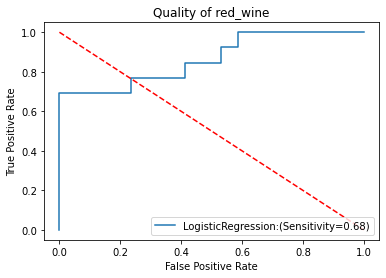

In [56]:
plt.figure()
plt.plot(fpr,tpr,label='LogisticRegression:(Sensitivity=%0.2f)'%logit_roc_auc1)
plt.plot([0,1],[1,0],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Quality of red_wine')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

## Coclusion

### Saving the model

In [57]:
import joblib
joblib.dump(GCV,"Titanic-project.pkl")

['Titanic-project.pkl']

### Loading the saved model

In [58]:
model=joblib.load("Titanic-project.pkl")

In [59]:
prediction=model.predict(x_test)

In [60]:
print(accuracy_score(y_test,prediction)*100)

66.66666666666666
